# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [42]:
# Code Here
import numpy as np
import pandas as pd
import palmerpenguins
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [35]:
df = load_penguins()
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [36]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [37]:
df = df.dropna()

In [40]:
df['year'] = df['year'].astype('object')
X = df[['species', 'island', 'bill_length_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year']]
y = df['bill_depth_mm']

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

X = ct.fit_transform(X)
X.head()

,dummify__species_Adelie,dummify__species_Chinstrap,dummify__species_Gentoo,dummify__island_Biscoe,dummify__island_Dream,dummify__island_Torgersen,dummify__sex_female,dummify__sex_male,dummify__year_2007,dummify__year_2008,dummify__year_2009,standardize__bill_length_mm,standardize__flipper_length_mm,standardize__body_mass_g
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.896042,-1.426752,-0.568475
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.822788,-1.069474,-0.506286
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.676280,-0.426373,-1.190361
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-1.335566,-0.569284,-0.941606
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.859415,-0.783651,-0.692852


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

# Multiple Linear Regression Models

## OLS

In [48]:
ols_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())])


ols_pipeline.fit(X, y)

print(f"MSE = {round(cross_val_score(ols_pipeline, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean() * -1, 3)}")

MSE = 0.882
MSE = 0.882


In [52]:
def mse_funct(model, hyperparameters, X, y):
    pipeline = Pipeline(
        [("preprocessing", ct),
        ("regression", model)])
        
    grid_search_cv = GridSearchCV(pipeline, hyperparameters, cv = 5, scoring= "neg_root_mean_squared_error")
    grid_search_cv.fit(X, y)

    best_pipeline = grid_search_cv.best_estimator_
    
    return round(cross_val_score(best_pipeline, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean() * -1, 3) 

## Lasso

In [53]:
lasso = Lasso()
hps = {"regression__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print(f"MSE = {mse_funct(lasso, hps, X, y)}")

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e-01, tolerance: 1.017e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.908e-01, tolerance: 1.096e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

MSE = 0.862
MSE = 0.862


## Ridge

In [54]:
ridge = Ridge()
hps = {"regression__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print(f"MSE = {mse_funct(ridge, hps, X, y)}")

MSE = 0.909
MSE = 0.909


## Elastic Net

In [56]:
elastic = ElasticNet()
params = {"regression__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           "regression__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}
mse_funct(elastic, params, X, y)

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+01, tolerance: 1.017e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+01, tolerance: 1.096e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e-01, tolerance: 1.017e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e-01, tolerance: 1.096e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

0.895

The Lasso model performed the best with an MSE of 0.862.

## Lasso Plot

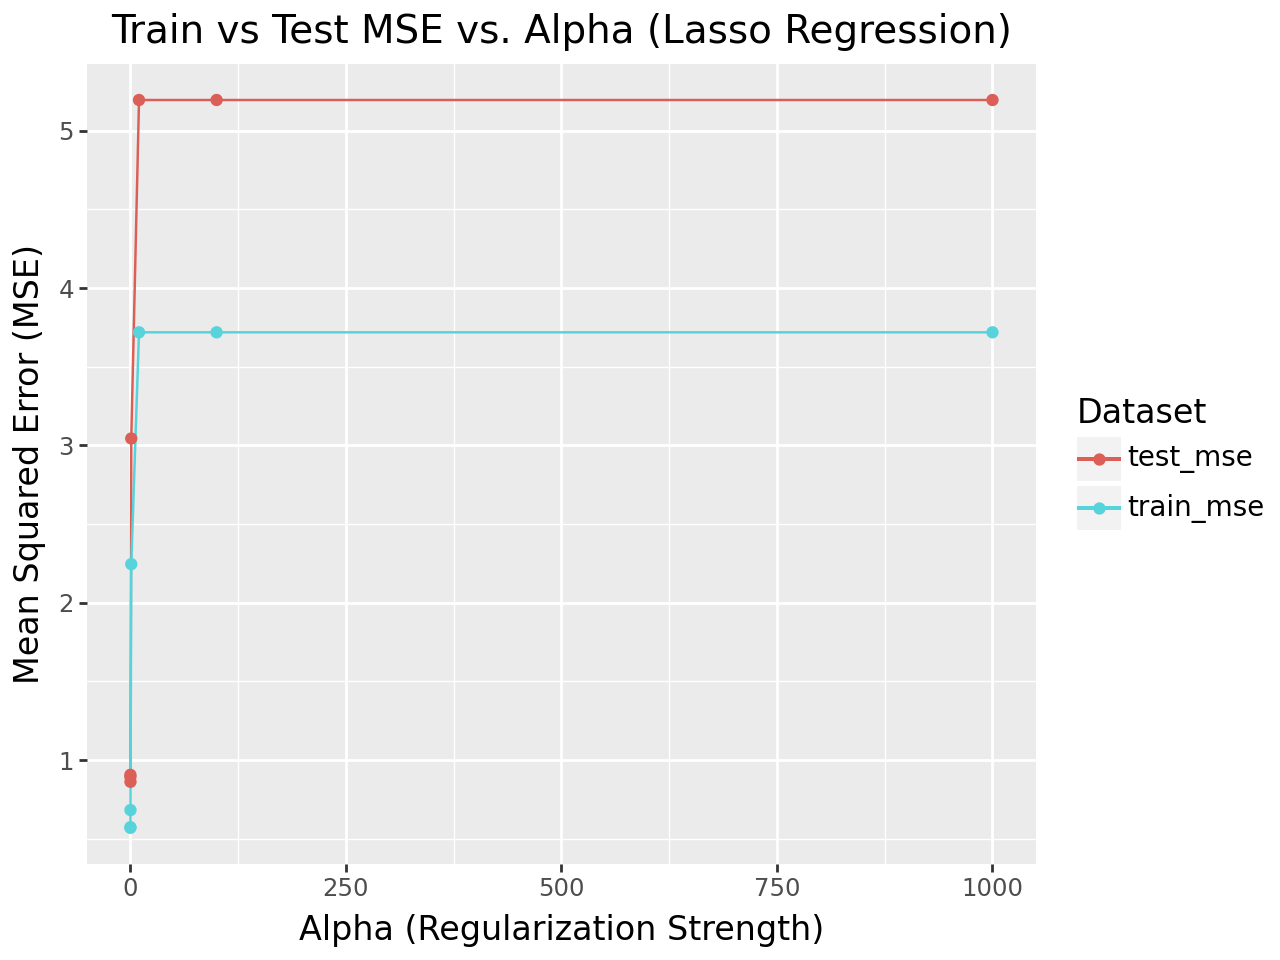

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


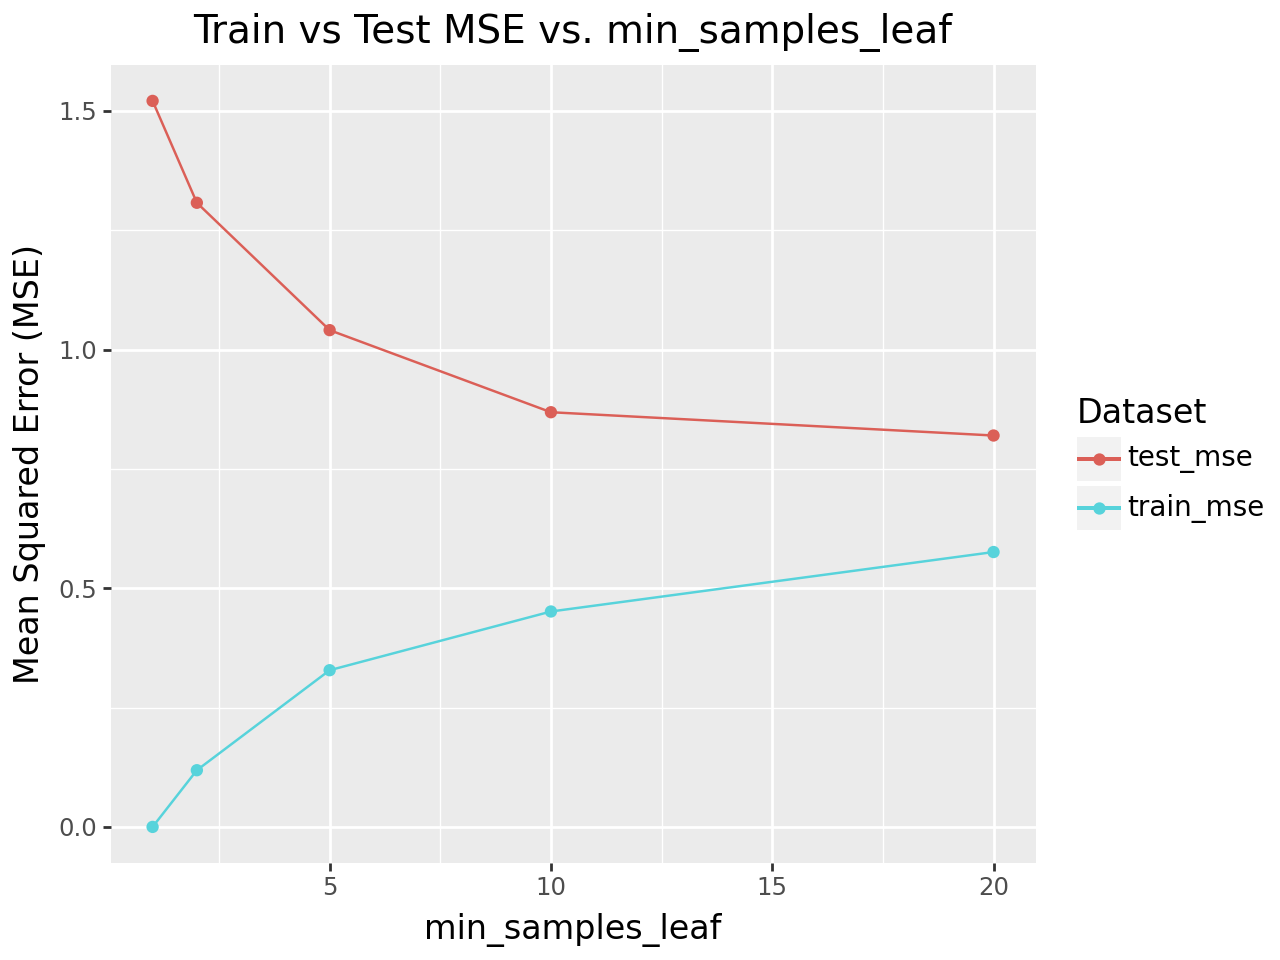

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


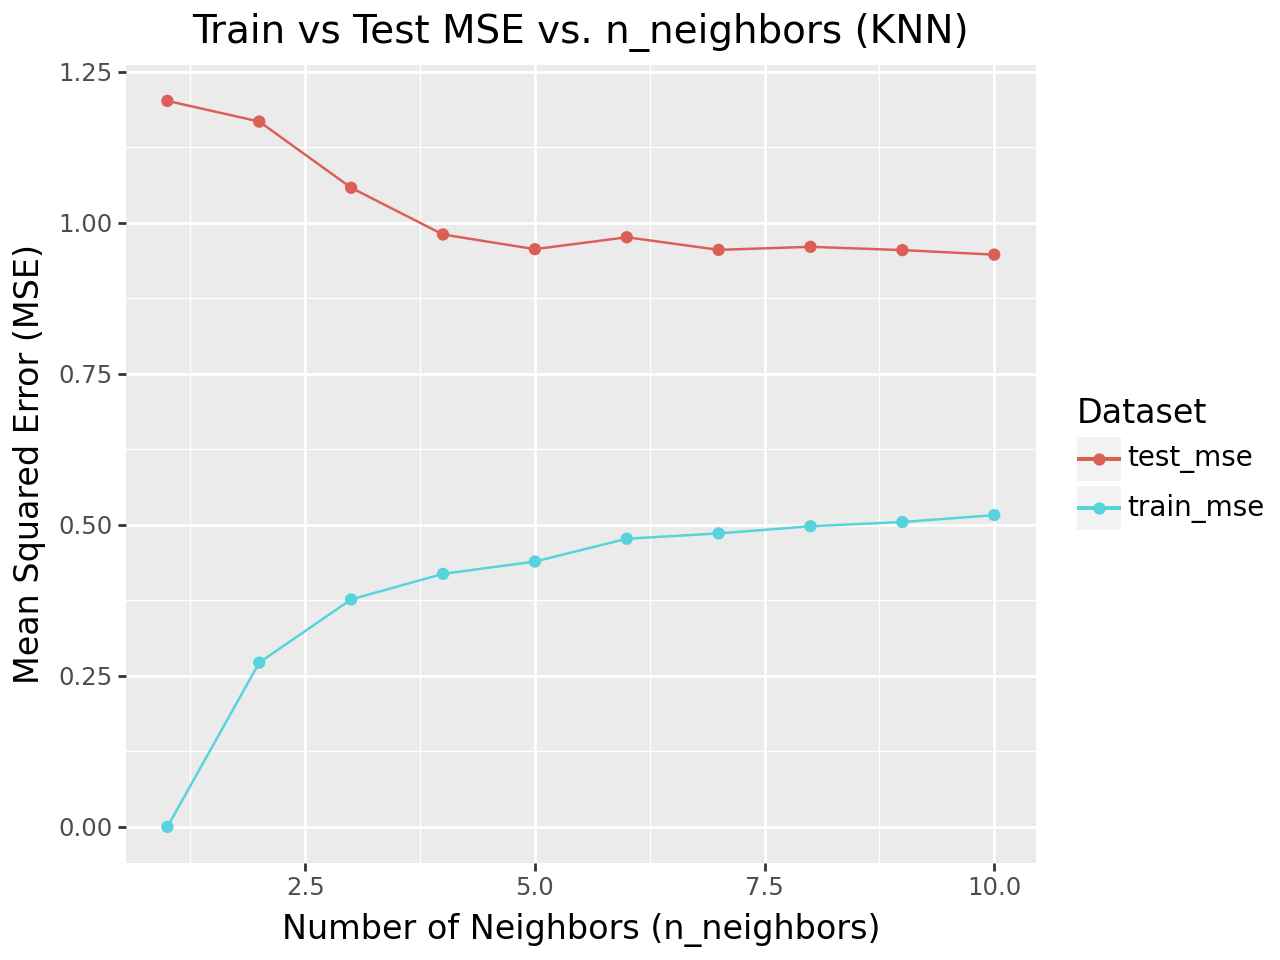

In [79]:

lasso_pipeline = Pipeline([
    ("preprocessing", ct),
    ("lasso", Lasso())
])

param_grid = {
    "lasso__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search_lasso = GridSearchCV(
    lasso_pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    return_train_score=True
)

grid_search_lasso.fit(X, y)

alpha_values = grid_search_lasso.cv_results_['param_lasso__alpha'].data
train_mse_values = -grid_search_lasso.cv_results_['mean_train_score']
test_mse_values = -grid_search_lasso.cv_results_['mean_test_score']

df_lasso = pd.DataFrame({
    'alpha': alpha_values,
    'train_mse': train_mse_values,
    'test_mse': test_mse_values
})

df_lasso_melted = df_lasso.melt(id_vars=["alpha"], value_vars=["train_mse", "test_mse"], 
                                var_name="dataset", value_name="mse")

((ggplot(df_lasso_melted, aes(x='alpha', y='mse', color='dataset'))
              + geom_line()
              + geom_point()
              + labs(title="Train vs Test MSE vs. Alpha (Lasso Regression)",
                     x="Alpha (Regularization Strength)",
                     y="Mean Squared Error (MSE)",
                     color="Dataset")
              + theme(axis_title=element_text(size=12),
                      plot_title=element_text(size=14),
                      legend_title=element_text(size=12),
                      legend_text=element_text(size=10))))

# KNN

In [66]:
k_values = [3, 5]
knn_pipelines = [
    Pipeline([("preprocessing", ct),
              ("knn", KNeighborsRegressor(n_neighbors=k))])
    for k in k_values
]

for k, pipeline in zip(k_values, knn_pipelines):
    pipeline.fit(X, y)
    mse = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error').mean() * -1  
    print(f"MSE for k={k} = {round(mse, 3)}")

MSE for k=3 = 1.058
MSE for k=5 = 0.957
MSE for k=3 = 1.058
MSE for k=5 = 0.957


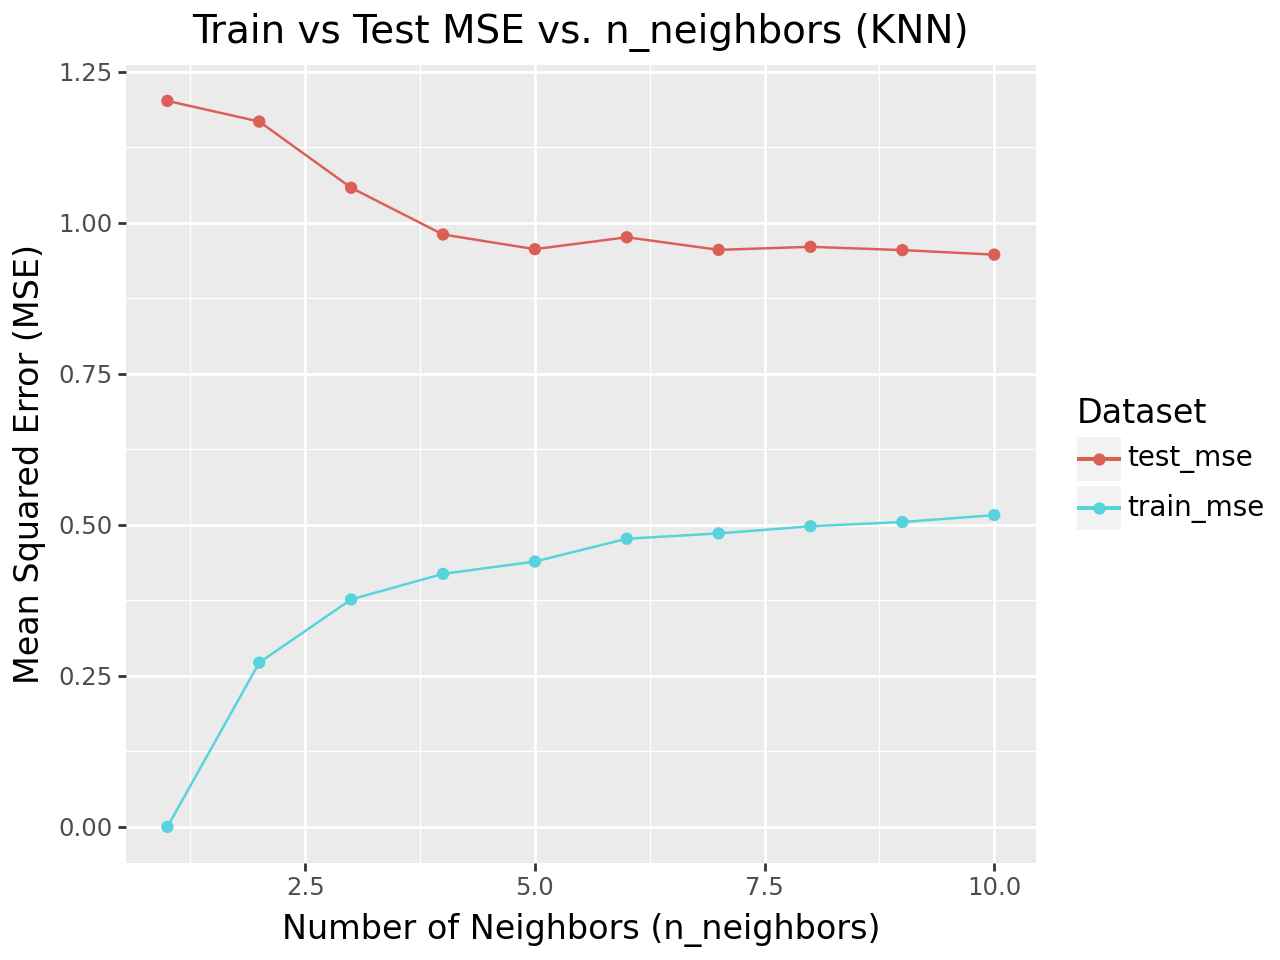

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


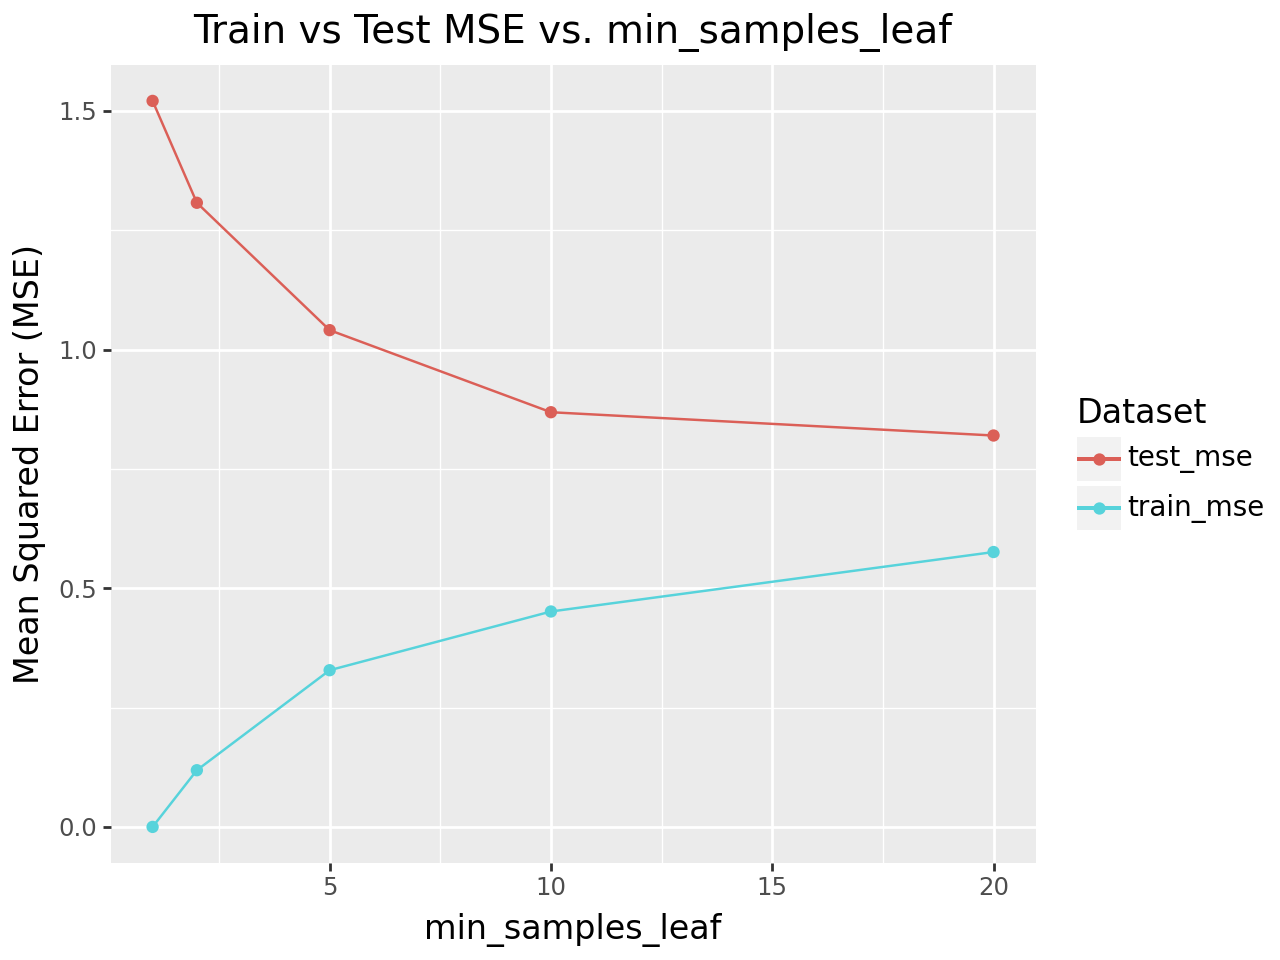

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


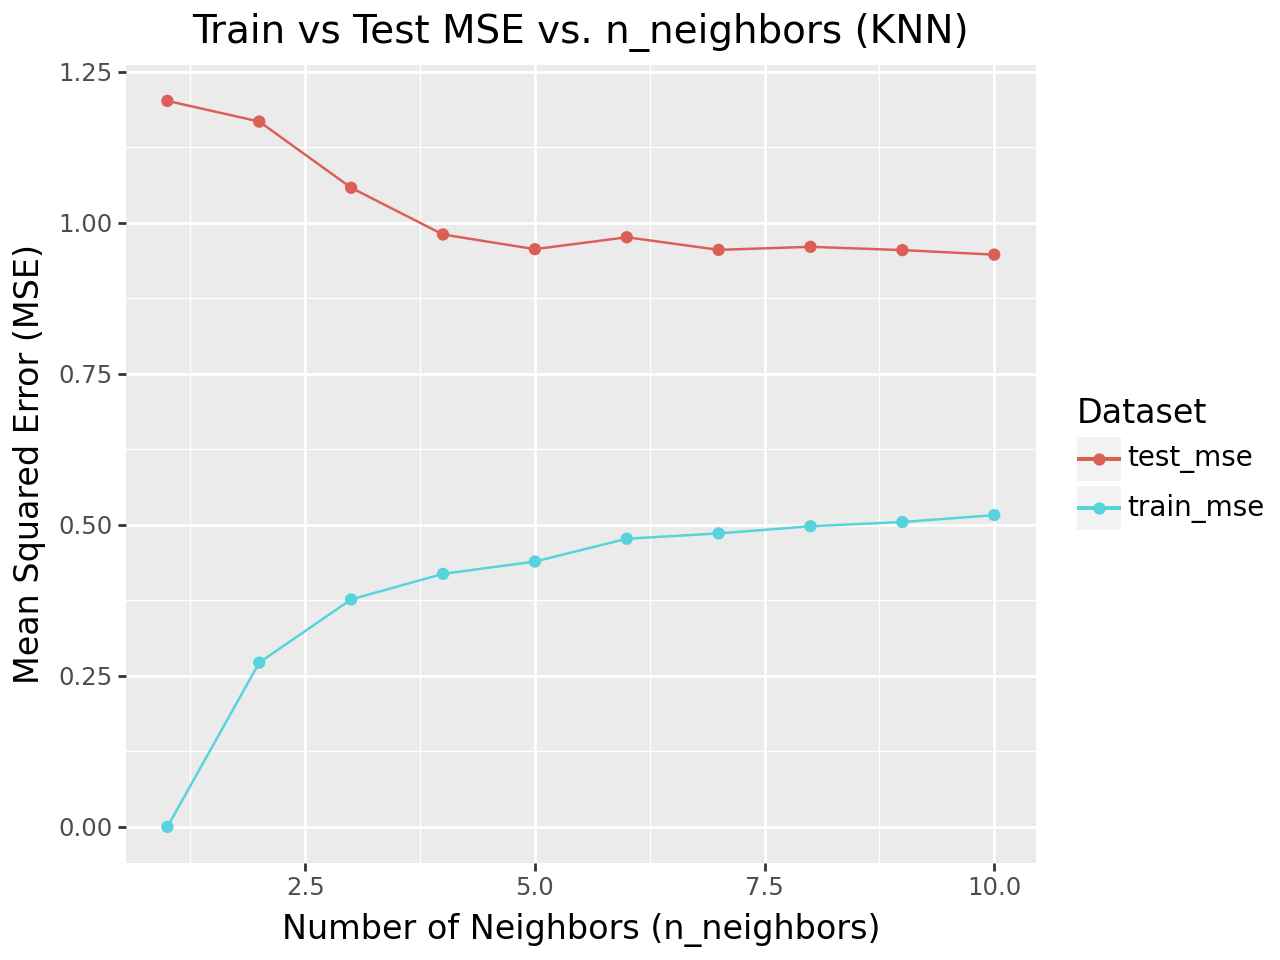

In [78]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme, element_text

knn_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsRegressor())
])

param_grid = {
    "knn__n_neighbors": list(range(1, 11))  
}

grid_search_knn = GridSearchCV(
    knn_pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    return_train_score=True  
)

grid_search_knn.fit(X, y)

n_neighbors_values = grid_search_knn.cv_results_['param_knn__n_neighbors'].data
train_mse_values = -grid_search_knn.cv_results_['mean_train_score']  
test_mse_values = -grid_search_knn.cv_results_['mean_test_score']    

df_knn = pd.DataFrame({
    'n_neighbors': n_neighbors_values,
    'train_mse': train_mse_values,
    'test_mse': test_mse_values
})

df_knn_melted = df_knn.melt(id_vars=["n_neighbors"], value_vars=["train_mse", "test_mse"], 
                            var_name="dataset", value_name="mse")

((ggplot(df_knn_melted, aes(x='n_neighbors', y='mse', color='dataset'))
            + geom_line()
            + geom_point()
            + labs(title="Train vs Test MSE vs. n_neighbors (KNN)",
                   x="Number of Neighbors (n_neighbors)",
                   y="Mean Squared Error (MSE)",
                   color="Dataset")
            + theme(axis_title=element_text(size=12),
                    plot_title=element_text(size=14),
                    legend_title=element_text(size=12),
                    legend_text=element_text(size=10)))
)


# Decision Tree

In [67]:
decision_tree_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeRegressor(random_state=42))  # Random state for reproducibility
])

decision_tree_pipeline.fit(X, y)
mse_dt = cross_val_score(
    decision_tree_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'
).mean() * -1  
print(f"MSE for Decision Tree = {round(mse_dt, 3)}")

MSE for Decision Tree = 1.521
MSE for Decision Tree = 1.521


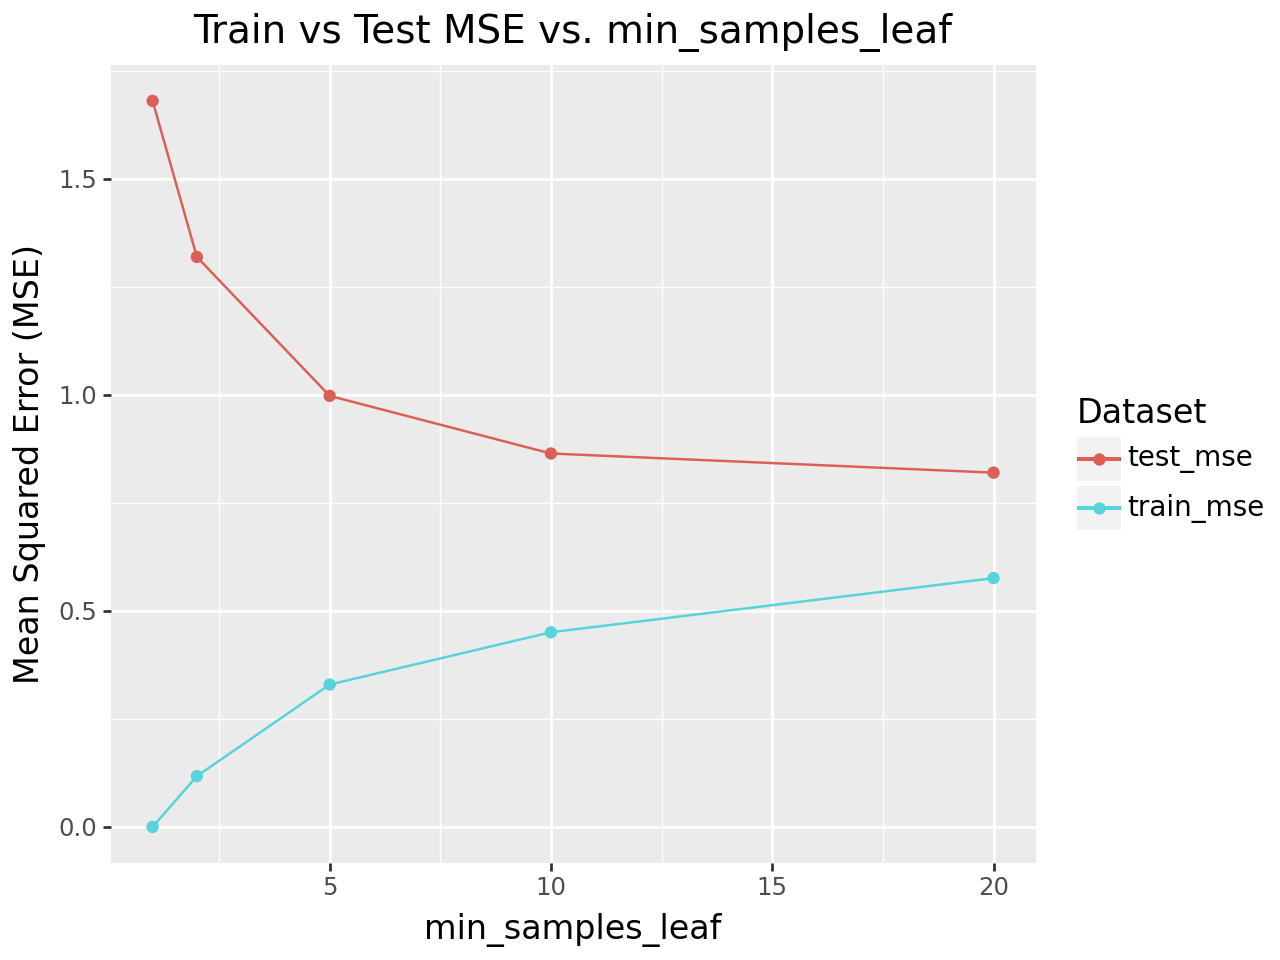

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


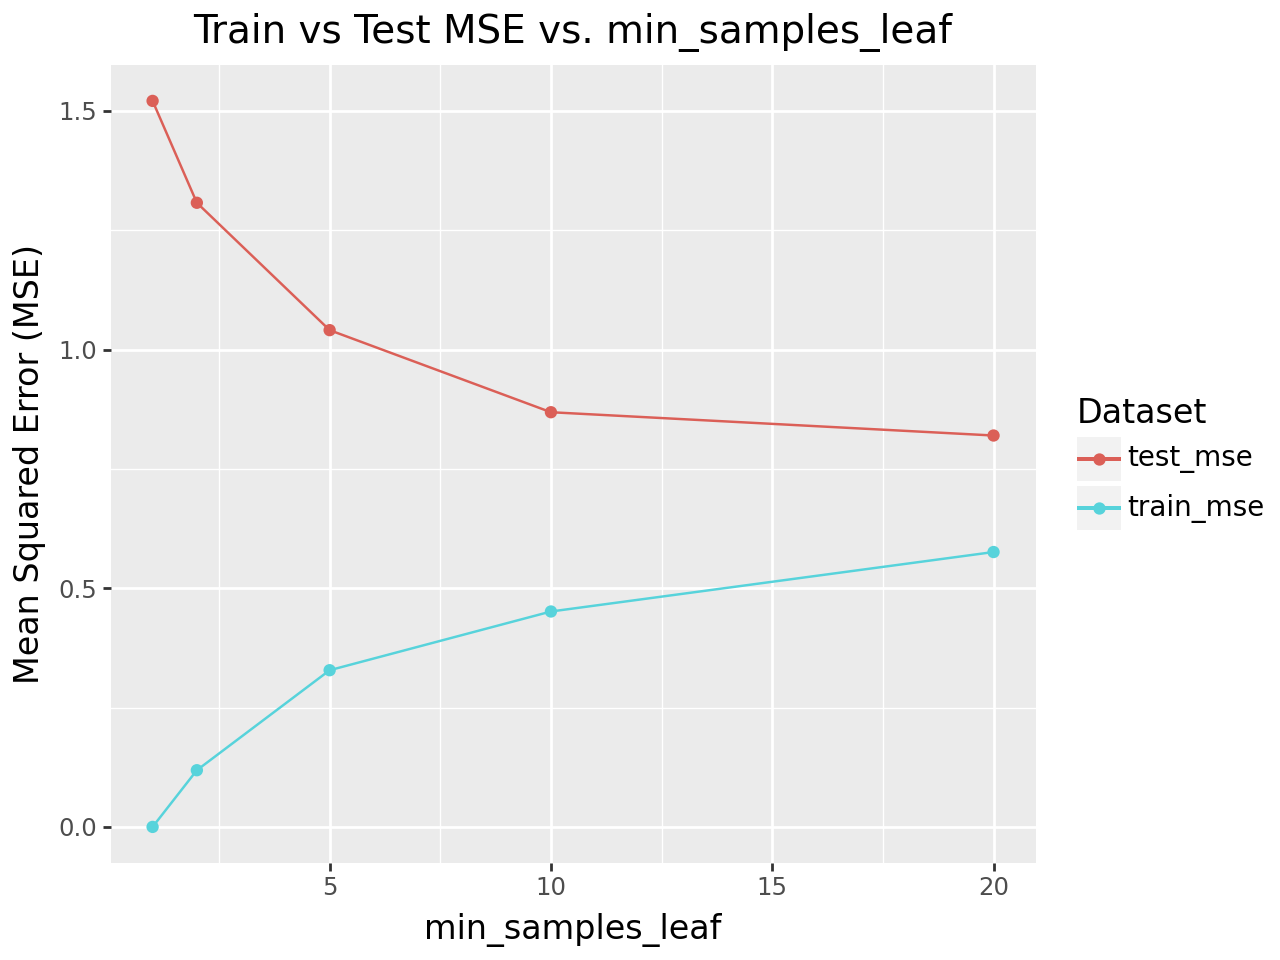

In [75]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme, element_text
import pandas as pd
decision_tree_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeRegressor())
])

param_grid = {
    "decision_tree__min_samples_leaf": [1, 2, 5, 10, 20]
}

grid_search = GridSearchCV(
    decision_tree_pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    return_train_score=True
)
grid_search.fit(X, y)

min_samples_leaf_values = grid_search.cv_results_['param_decision_tree__min_samples_leaf'].data
train_mse_values = -grid_search.cv_results_['mean_train_score']
test_mse_values = -grid_search.cv_results_['mean_test_score']



df = pd.DataFrame({
    'min_samples_leaf': grid_search.cv_results_['param_decision_tree__min_samples_leaf'].data,
    'train_mse': -grid_search.cv_results_['mean_train_score'],
    'test_mse': -grid_search.cv_results_['mean_test_score']
})

df_melted = df.melt(id_vars=["min_samples_leaf"], value_vars=["train_mse", "test_mse"], var_name="dataset", value_name="mse")

((ggplot(df_melted, aes(x='min_samples_leaf', y='mse', color='dataset'))
        + geom_line()
        + geom_point()
        + labs(title="Train vs Test MSE vs. min_samples_leaf",
               x="min_samples_leaf",
               y="Mean Squared Error (MSE)",
               color="Dataset")
        + theme(axis_title=element_text(size=12),
                plot_title=element_text(size=14),
                legend_title=element_text(size=12),
                legend_text=element_text(size=10)))
)

